In [1]:
# Importing libraries
import pickle
from tropical import clustering

In [2]:
# Loading dynamic signatures
with open('signatures.pickle', 'rb') as handle:
    all_signatures = pickle.load(handle)

# Obtaining signature of how the species 0 (the enzyme) is being consumend
sp0_sign_reactants = all_signatures[0]['consumption']

# Initializing clustering object
clus = clustering.ClusterSequences(sp0_sign_reactants, unique_sequences=False)
clus.diss_matrix()
clus.Kmeans(2)
clus.silhouette_score()

<bound method ClusterSequences.silhouette_score of <tropical.clustering.ClusterSequences object at 0x111b954d0>>

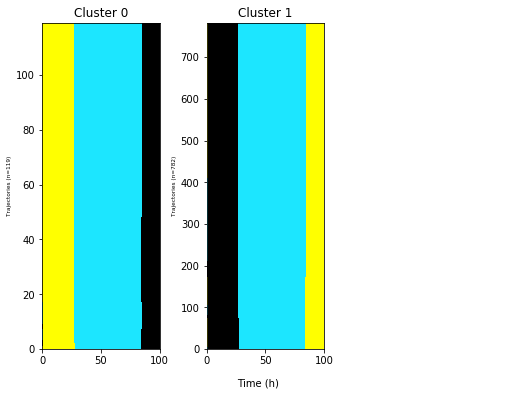

In [3]:
%matplotlib inline
# Plotting clustered signatures
pl = clustering.PlotSequences(clus)
pl.all_trajectories_plot()

In [ ]:
from tropical.examples.double_enzymatic.mm_two_paths_model import model
from pysb.simulator.base import SimulationResult

# load simulations
sims = SimulationResult.load()